# STOCK PREDICTION USING MACHINE LEARNING

>**Team members:**



    1.Vaikunth Guruswamy(2019504602)
    2.Abdul Raheem G. A. (2019504501)
    3.Sanjay Krushnan R. C. (2019504577)


> **Objective:**
 

Our main objective is to give idea and help people to predict where to invest in Stock market using our Machine Learning Model.

> **Motivation:** 

  

In this pandemic situation the stock market became likely unstable and became difficult to predict so, In order to overcome this issue we designed a machine learning model which predicts future stock market values.


> **Methodology:**




The concept of Linear Regression is been used in our program to predict the future values of Stock market.



# Importing libraries

In [1]:
!pip install yfinance
import math  
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf #to get stock list
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Collecting dataset

In [8]:

df = pd.DataFrame() #to allign the data in tabular fashion
company="GOOG"  #taking google's stock
try:   #to raise exception ,if no stock is there(instead of error )
  stock = []
  d=datetime.date.today()  #initialising the current date to d
  ud=d+datetime.timedelta(4)
  stock = yf.download("GOOG", start="2000-01-01", end=str(ud)) #downloading all stocks of google and adding to "stock" list 
  if len(stock) == 0: #if no stock is there, instead of error , none keyword is given
    None
  else: 
    df = df.append(stock) #appending stocks in dataframe
except Exception:
  None
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2021-02-25,2067.449951,2094.879883,2021.290039,2031.359985,2031.359985,1828400
2021-02-26,2050.520020,2071.010010,2016.060059,2036.859985,2036.859985,2083500
2021-03-01,2056.520020,2086.520020,2046.099976,2081.510010,2081.510010,1404500


# Modifiying dataset according to need

In [9]:
future=1 #intialising future as 1 , simply initialising as we can change "future" variable value any time , to avoid changing each time whenprogram needs  
x=np.array(df) #assigning each column in stock as array 
df['Pred-close']=df[['Close']].shift(-future)  #shifting the particular df column with respect value in future, for prediction
df['Pred-low']=df[['Low']].shift(-future)    #shifting the particular df column with respect value in future, for prediction
df['Pred-high']=df[['High']].shift(-future)   #shifting the particular df column with respect value in future, for prediction
df['Pred-open']=df[['Open']].shift(-future)    #shifting the particular df column with respect value in future, for prediction

In [10]:
del df["Adj Close"] #deleting unwanted details in stokfor prediction
del df['Volume'] #deleting unwanted details in stokfor prediction
df

,Open,High,Low,Close,Pred-close,Pred-low,Pred-high,Pred-open
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,53.952770,50.062355,54.336334,50.316402
2004-08-20,50.316402,54.336334,50.062355,53.952770,54.495735,54.321388,56.528118,55.168217
2004-08-23,55.168217,56.528118,54.321388,54.495735,52.239197,51.591621,55.591629,55.412300
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.802086,51.746044,53.798351,52.284027
2004-08-25,52.284027,53.798351,51.746044,52.802086,53.753517,52.134586,53.773445,52.279045
...,...,...,...,...,...,...,...,...
2021-02-25,2067.449951,2094.879883,2021.290039,2031.359985,2036.859985,2016.060059,2071.010010,2050.520020
2021-02-26,2050.520020,2071.010010,2016.060059,2036.859985,2081.510010,2046.099976,2086.520020,2056.520020
2021-03-01,2056.520020,2086.520020,2046.099976,2081.510010,2075.840088,2071.260010,2104.370117,2076.189941


# Final dataset

In [11]:
l1=["Pred-close","Pred-low","pred-high","Pred-open"] #taking columns of "Pred-close","Pred-low","pred-high","Pred-open"
df.reset_index(level="Date",inplace=True) #to initialise index to each row in dataframe
df

,Date,Open,High,Low,Close,Pred-close,Pred-low,Pred-high,Pred-open
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,53.952770,50.062355,54.336334,50.316402
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,54.495735,54.321388,56.528118,55.168217
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,52.239197,51.591621,55.591629,55.412300
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.802086,51.746044,53.798351,52.284027
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,53.753517,52.134586,53.773445,52.279045
...,...,...,...,...,...,...,...,...,...
4158,2021-02-25,2067.449951,2094.879883,2021.290039,2031.359985,2036.859985,2016.060059,2071.010010,2050.520020
4159,2021-02-26,2050.520020,2071.010010,2016.060059,2036.859985,2081.510010,2046.099976,2086.520020,2056.520020
4160,2021-03-01,2056.520020,2086.520020,2046.099976,2081.510010,2075.840088,2071.260010,2104.370117,2076.189941
4161,2021-03-02,2076.189941,2104.370117,2071.260010,2075.840088,2026.709961,2010.000000,2088.518066,2067.209961


# Creating model and displaying the output graph 

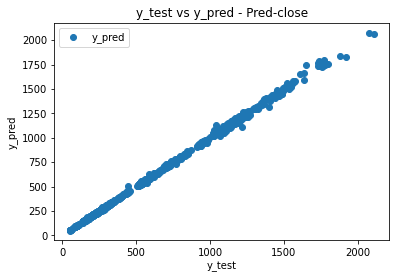

accuracy Pred-close : 99.92147227382307 %


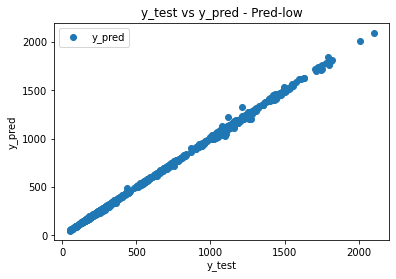

accuracy Pred-low : 99.94372745615095 %


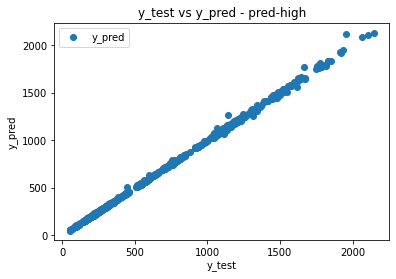

accuracy pred-high : 99.94811791290432 %


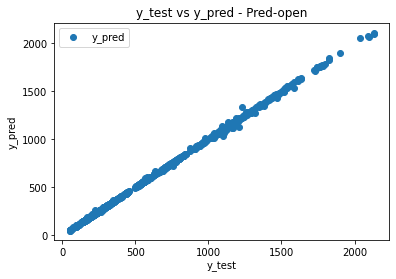

accuracy Pred-open : 99.96500760616432 %
dictionary of predicted values :  {'Pred-close': 2036.772239770558, 'Pred-low': 1997.2680795100623, 'pred-high': 2061.707122212386, 'Pred-open': 2027.6060728351845}


In [14]:
def model(i,q):       #function to return required predicted values,(chosen function since it can be used in any rest part of the (program) ) i-->coresponds to each prediction column , q--> name of the required prediction column
    dt=DecisionTreeRegressor()     #chosen all 4 regression model to compare the accuracy of predicted value in each model
    sv=SVR()     
    rf=RandomForestRegressor() 
    lr=LinearRegression()
    l=[lr,rf,sv,dt]      #form a list of all models ,(as it would be useful to run a loop)
    ac=[]
    x=df.iloc[:-1,1:5].values #slicing the dataframe for input parameter 
    y=df.iloc[:-1,5+i].values #slicing the dataframe for each output parameter
    (x_train, x_test, y_train ,y_test) = train_test_split(x,y,test_size=.3) #assigning the data to x_train, x_test, y_train ,y_test using split function 
    for j in l:  #loop for getting each model and to test accuracy with each model's predictions 
        j.fit(x_train,y_train)
        ac.append(j.score(x_test,y_test))  #appending score values in list ac
    mo=l[ac.index(max(ac))]  #taking the max of score for good precision of prediction
    y_pred=mo.predict(x_test) #initialising the highest score predicte value to ypred
    t="y_test vs y_pred - "+q #assigning corresponding title for each predicted value
    plt.scatter(y_pred,y_test,label="y_pred") #plotting the graph between ytest(actual value) and y_pred(predicted value) for each predicted value for close,open,high,low
    plt.title(t)             #assigning title
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.legend()
    plt.show()                    #showing the graph
    return(l[ac.index(max(ac))],max(ac)) #returning "accurate model" and "more accurate score" to calling function model in MAIN for LOOP 
models={}
pred_values={}
for i in range(4): #running for loop 4times to predict close,open,high,low "MAIN LOOP"
    m,ac=model(i,l1[i])
    pred_values[l[i]]=m.predict([df.iloc[-1,1:5].values])[0] #intialising predicted labeland value to the set
    print("accuracy "+l[i]+" :",ac*100,"%") #to print the accuracy rate in percentage
print("dictionary of predicted values : ",pred_values)

In [15]:
df.iloc[-1,5:]=pred_values.values() # to add the predicted value in the dataframe df
df.tail() #checking the predicted value for last 5 days

,Date,Open,High,Low,Close,Pred-close,Pred-low,Pred-high,Pred-open
4158,2021-02-25,2067.449951,2094.879883,2021.290039,2031.359985,2036.859985,2016.060059,2071.010010,2050.520020
4159,2021-02-26,2050.520020,2071.010010,2016.060059,2036.859985,2081.510010,2046.099976,2086.520020,2056.520020
4160,2021-03-01,2056.520020,2086.520020,2046.099976,2081.510010,2075.840088,2071.260010,2104.370117,2076.189941
4161,2021-03-02,2076.189941,2104.370117,2071.260010,2075.840088,2026.709961,2010.000000,2088.518066,2067.209961
4162,2021-03-03,2067.209961,2088.518066,2010.000000,2026.709961,2036.772240,1997.268080,2061.707122,2027.606073


In [16]:
di={"Date":str(d+datetime.timedelta(1))+" 00:00:00","Open":pred_values["Pred-close"],"High":pred_values["pred-high"],"Low":pred_values["Pred-low"],"Close":pred_values["Pred-close"]}
di=pd.DataFrame([di])
df=pd.concat([df,di],ignore_index=True) #adding the dataframe of pricted and old dataframe to check the extent of accuracycbg
df.tail()


,Date,Open,High,Low,Close,Pred-close,Pred-low,Pred-high,Pred-open
4159,2021-02-26 00:00:00,2050.520020,2071.010010,2016.060059,2036.859985,2081.510010,2046.099976,2086.520020,2056.520020
4160,2021-03-01 00:00:00,2056.520020,2086.520020,2046.099976,2081.510010,2075.840088,2071.260010,2104.370117,2076.189941
4161,2021-03-02 00:00:00,2076.189941,2104.370117,2071.260010,2075.840088,2026.709961,2010.000000,2088.518066,2067.209961
4162,2021-03-03 00:00:00,2067.209961,2088.518066,2010.000000,2026.709961,2036.772240,1997.268080,2061.707122,2027.606073
4163,2021-03-05 00:00:00,2036.772240,2061.707122,1997.268080,2036.772240,NaN,NaN,NaN,NaN


# **The end**
**thank you**